<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EDO2orden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una barra de metal está a una temperatura $T_1=50$ en un extremo y $T_2=200$ en el otro con los siguientes datos:

* $L = 10m$ Longitud de la barra
* $\alpha = 0.01m^{-2}$ Factor de dispersión de calor
* $Ta = 25°C$ Temperatura ambiente
* $T(x_0=0) = 50°C$ Temperatura de la barra en el extremo izquierdo
* $T(x_1=L) = 200°C$ Temperatura de la barra en el extremo derecho

**Solución** Convertir la ecuación de segundo orden en un sistema de ecuaciones de primer orden

$$
\frac{dT}{dx}=\mu \\
\frac{d^2T}{dx^2}=\frac{d\mu}{dx}=\alpha(T -T_a)
$$

Esto es un sistema de ecuaciones ordinarias, con los valores iniciales $T(x_1 = 0) = 50$ para
la segunda ecuación y $\mu(x_1 = 0) =?$ un valor que debemos suponer para obtener un primer
resultado para $T(x_2 = L)$, si no es el valor esperado entonces se hace otra suposición.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def f(U, y):
  u1 , u2 = U
  alfa = 0.01
  Ta = 25
  du_dy = u2
  du2_dy2 = alfa*(u1 -Ta)
  return [du_dy, du2_dy2]

In [12]:
L = 10 # Longitud de la barra
Tx1 = 50 # temperatura en el extremo x1 =0
Tx2 = 200 # temperatura en el extremo x2=L
dT1 = 10 # Valor supuesto de la derivada
barra = np.linspace (0, L) # Vector de la longitud de la barra
# Solucion del sistema
tiro1 = odeint(f,[Tx1,dT1], barra )
print('Primer tiro')
print('Temperatura en el extremo x2=L : {} '.format(tiro1[-1,0]))

Primer tiro
Temperatura en el extremo x2=L : 181.09713828684858 


In [13]:
dT2 = 20 # Valor supuesto de la derivada
# Solucion del sistema
tiro2 = odeint(f,[Tx1,dT2],barra)
print('Segundo tiro')
print('Temperatura en el extremo x2=L : {} '.format(tiro2[-1,0]))

Segundo tiro
Temperatura en el extremo x2=L : 298.6172583809675 


In [14]:
from scipy.interpolate import interp1d

In [18]:
pol=interp1d([tiro1[-1,0],tiro2[-1,0]],
             [dT1,dT2])

In [21]:
dT3=pol(Tx2)
dT3

array(11.60847876)

In [22]:
tiro3 = odeint(f,[Tx1,dT3],barra)
print('Tercer tiro')
print('Temperatura en el extremo x2=L : {} '.format(tiro3[-1,0]))

Tercer tiro
Temperatura en el extremo x2=L : 199.99999991834952 


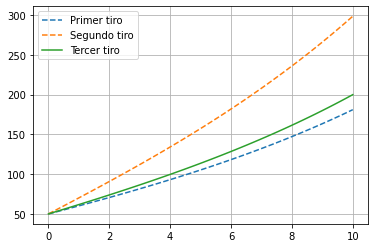

In [26]:
plt.plot(barra,tiro1[:,0],'--',label='Primer tiro')
plt.plot(barra,tiro2[:,0],'--',label='Segundo tiro')
plt.plot(barra,tiro3[:,0],'-',label='Tercer tiro')
plt.legend()
plt.grid()
plt.show()